# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course</strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Title**: CNN || **Session**: 6</em></font>


## Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Dataset

Now we have to import and preprocess the MNIST dataset, which is a collection of handwritten digits commonly used for training various image processing systems. The MNIST dataset contains 60,000 training images and 10,000 testing images. Each image is 28x28 pixels and is labeled with the digit it represents (0 through 9).

## Step 2: Define transformations and load the MNIST dataset

To prepare the dataset for our CNN, we need to apply a few transformations:

1. Convert images to PyTorch tensors: The `transforms.ToTensor()` transformation converts the images from PIL Image format to PyTorch tensors. This is necessary because PyTorch models expect input data in tensor format.

1. Normalize the images: The `transforms.Normalize((0.1307,), (0.3081,))` transformation normalizes the images. The mean and standard deviation used here are the standard values for the MNIST dataset. Normalization helps in speeding up the training process and achieving better convergence. Specifically, it adjusts the pixel values to have a mean of 0.1307 and a standard deviation of 0.3081.

Here’s the code for the transformations and loading the dataset:

In [ ]:
# Step 2: Define transformations and load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4794220.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 480805.95it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4351691.81it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5253868.94it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### MNIST

The MNIST dataset (Modified National Institute of Standards and Technology) is a widely-used benchmark in machine learning, consisting of 70,000 grayscale images of handwritten digits from 0 to 9. Each image is 28x28 pixels in size, making it compact and easy to process. MNIST serves as a standard dataset for training and evaluating image classification models, offering a simple yet effective way to test algorithms in computer vision tasks.

We have loaded this dataset in the prevoius cell. Here we will see some examples of it.  

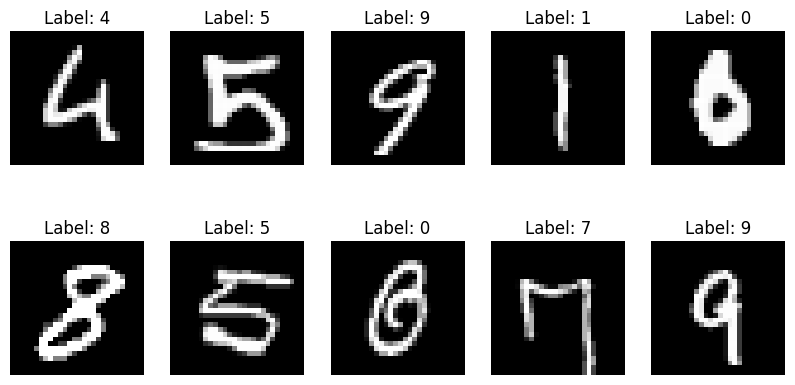

In [ ]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot the images and labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    img = images[i].squeeze()
    label = labels[i].item()
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.show()


### Step 3: Define the CNN Model

In this cell, we define a simple Convolutional Neural Network (CNN) using PyTorch. In summary it is like this:

- **Model Structure:**
  - **Convolutional Layers:**
    - `conv1`: Applies 32 filters of size 3x3.
    - `conv2`: Applies 64 filters of size 3x3.
  - **Dropout Layers:**
    - `dropout1`: Applies dropout with a 25% probability.
    - `dropout2`: Applies dropout with a 50% probability.
  - **Fully Connected Layers:**
    - `fc1`: Transforms the flattened output to 128 features.
    - `fc2`: Maps to 10 output classes.

- **Forward Pass:**
  - Passes through all the defined layers.
  - Uses `log_softmax` for the final output to produce class probabilities.

This model is designed for image classification, where the input is a grayscale image and the output is a probability distribution over 10 classes.


In [ ]:
# Step 3: Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

model = SimpleCNN()

As always we have to define an optimizer.

In [ ]:
# Step 4: Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Step 5: Train the model
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


In [ ]:
# Step 6: Test the model
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')


In [ ]:
# Step 7: Set device and run training/testing
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.319196
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.299570
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.225270
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.179133
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.247669
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.135966
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.078079
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.081228
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.190236
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.058307

Test set: Average loss: 0.0000, Accuracy: 9850/10000 (98%)



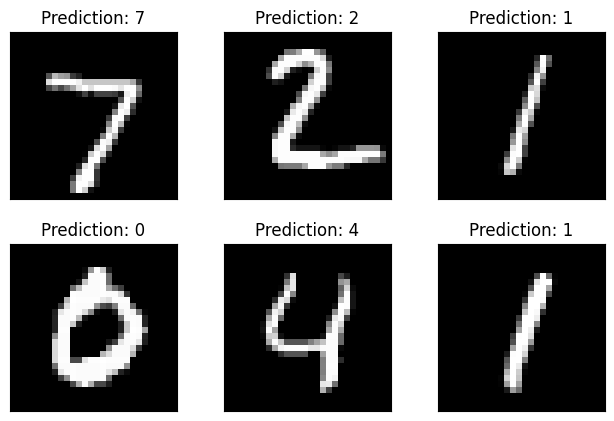

In [ ]:
# Step 8: Visualize some predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data.to(device))

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f'Prediction: {output.argmax(dim=1, keepdim=True)[i].item()}')
    plt.xticks([])
    plt.yticks([])
plt.show()


## Semantic Segmentation

Segmentation is a key technique in computer vision, where the goal is to partition an image into distinct regions, each representing a different object or feature. This process involves classifying each pixel or group of pixels into predefined categories. Segmentation is crucial for tasks such as image analysis, object detection, and scene understanding, enabling precise and meaningful interpretation of visual data for various applications in fields like healthcare, autonomous driving, and robotics.

<img src="https://blog.roboflow.com/content/images/2022/10/MEB9F.png" alt="FCN Architecture" width="700"/>

In [ ]:
!pip install -q numpy matplotlib torch torchvision opencv-python requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 9.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import requests
from PIL import Image
from io import BytesIO

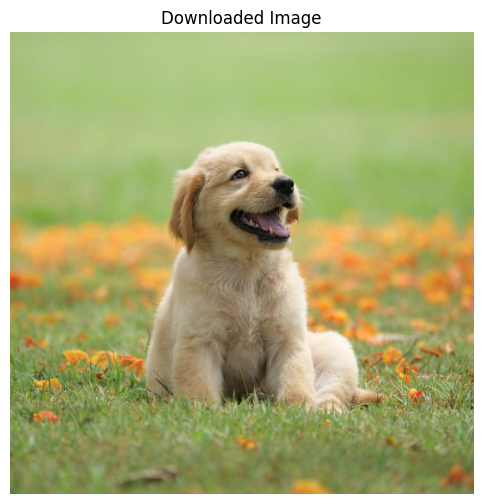

In [ ]:
# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# Specify the image URL
image_url = 'https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=0.752xw:1.00xh;0.175xw,0&resize=1200:*'  # Replace with an actual image URL
image = download_image(image_url)

# Display the downloaded image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Downloaded Image')
plt.axis('off')
plt.show()

In [ ]:
# Define the image transformations
transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Preprocess the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

We will use a pre-trained model based on the **Fully Convolutional Network (FCN)** architecture. FCNs are specifically designed for **semantic segmentation**, where they classify each pixel in an image into distinct categories. Unlike traditional CNNs, which output single class scores, FCNs utilize convolutional layers throughout, enabling them to produce detailed spatial maps. This capability makes FCNs ideal for tasks requiring precise pixel-level predictions and spatial understanding.


<img src="https://production-media.paperswithcode.com/methods/new_alex-model.jpg" alt="FCN Architecture" width="700"/>

In [ ]:
# Load a pre-trained FCN model
model = torchvision.models.segmentation.fcn_resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:01<00:00, 87.5MB/s]


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

Now we can perform segmentation over our image:

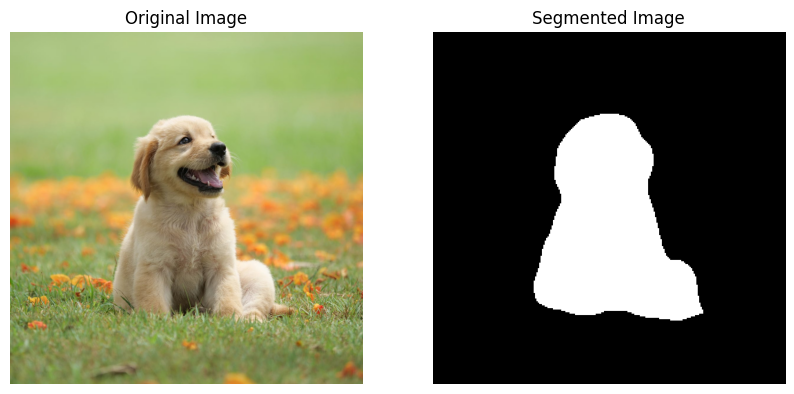

In [ ]:
# Perform the segmentation
with torch.no_grad():
    output = model(image_tensor)['out'][0]
output_predictions = output.argmax(0)

# Convert the segmentation map to a numpy array
segmentation = output_predictions.byte().cpu().numpy()

# Display the segmented image
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(segmentation, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()